# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [68]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [69]:
file_path = r'C:\Users\Administrator\Desktop\data analyst\week19\lab-problems-in-ml\data\boston_data.csv'
boston = pd.read_csv(file_path)

In [70]:
boston.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [71]:
boston.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

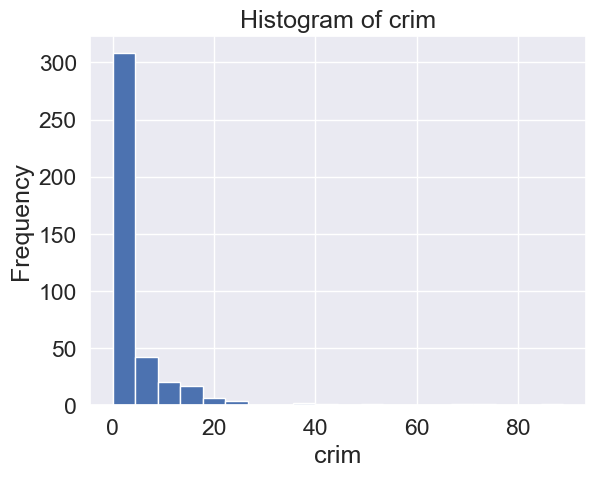

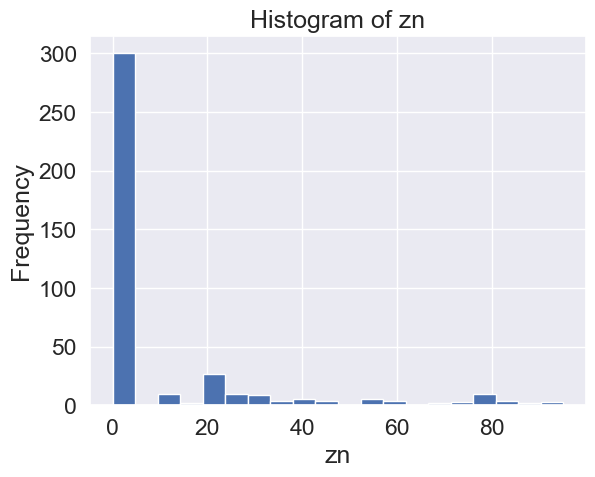

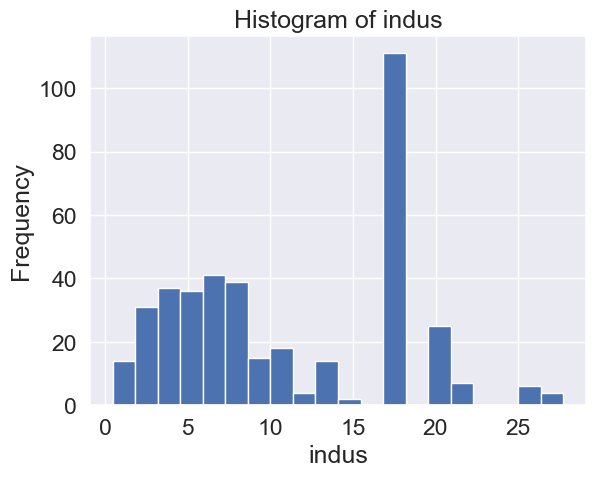

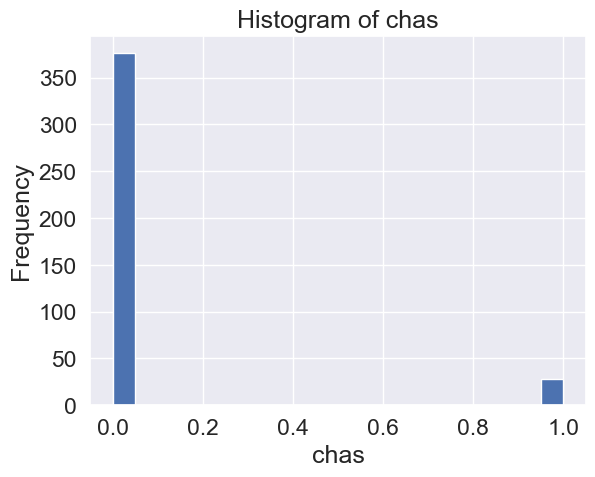

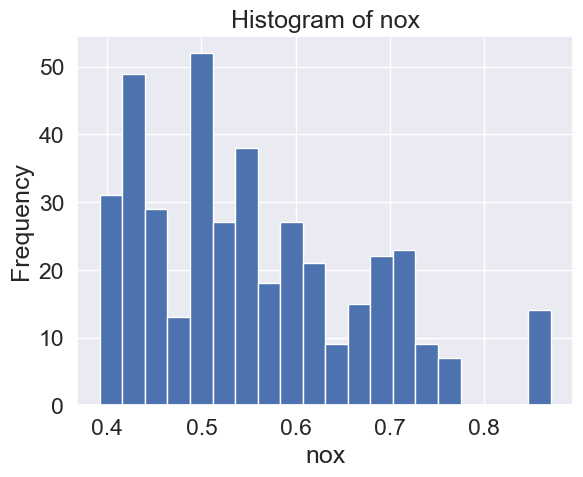

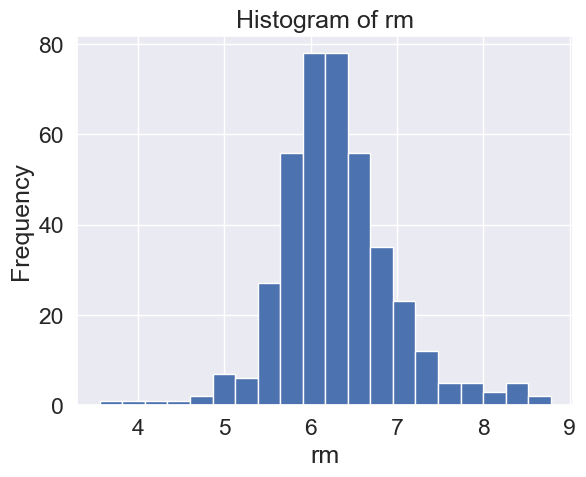

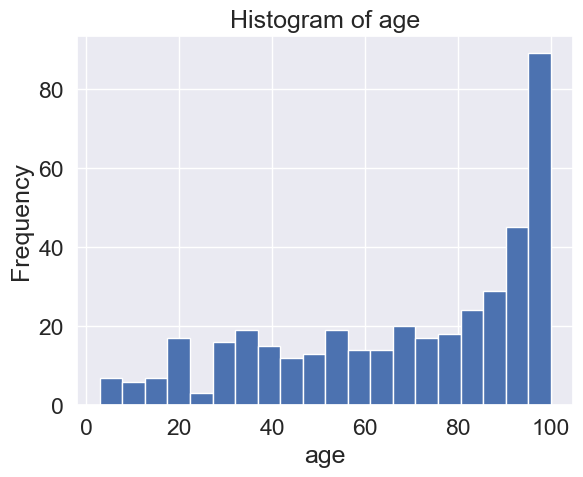

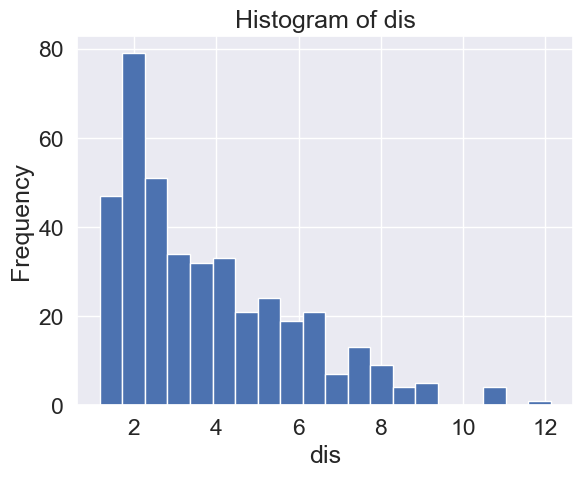

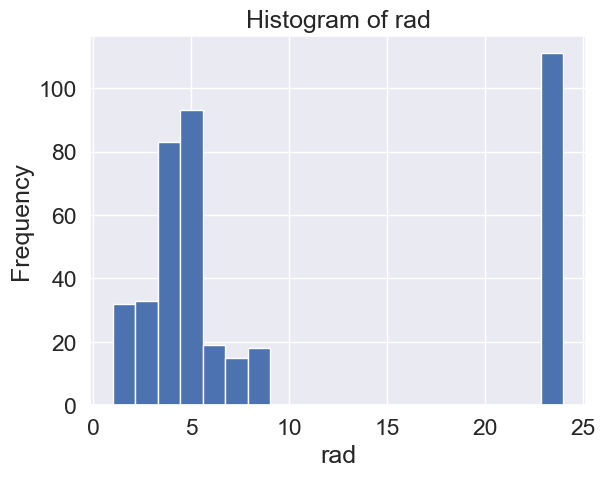

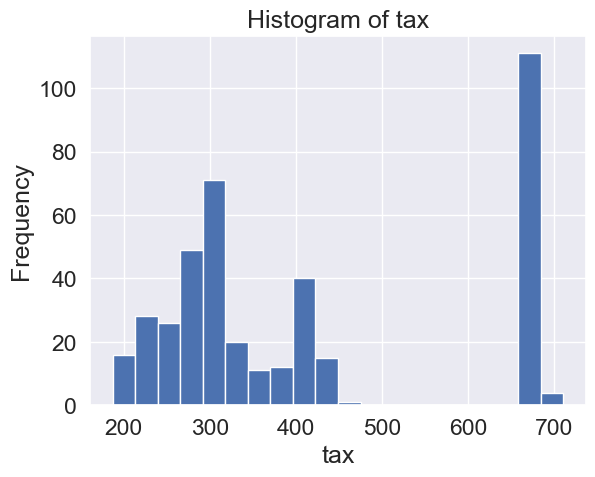

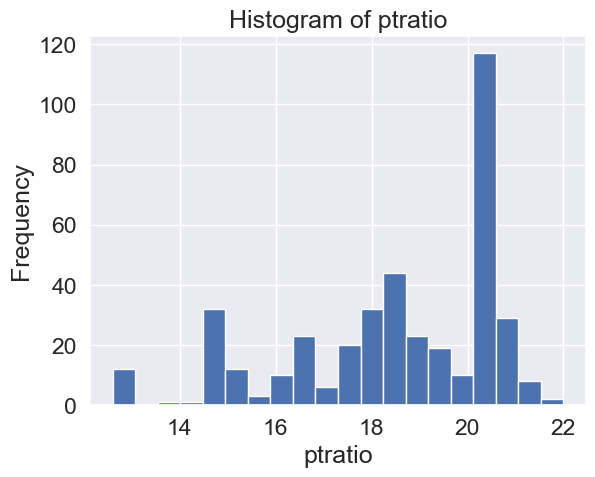

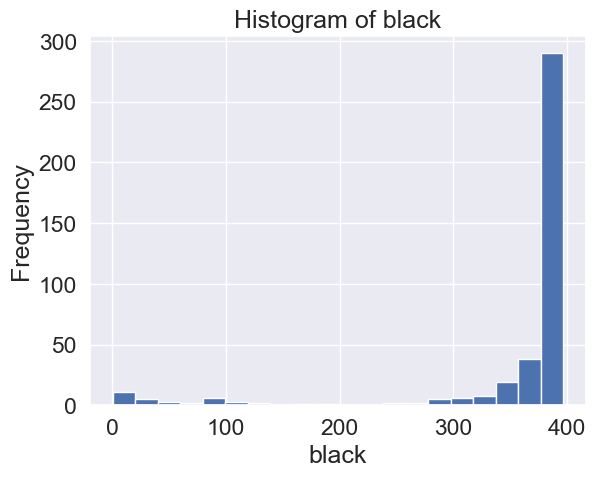

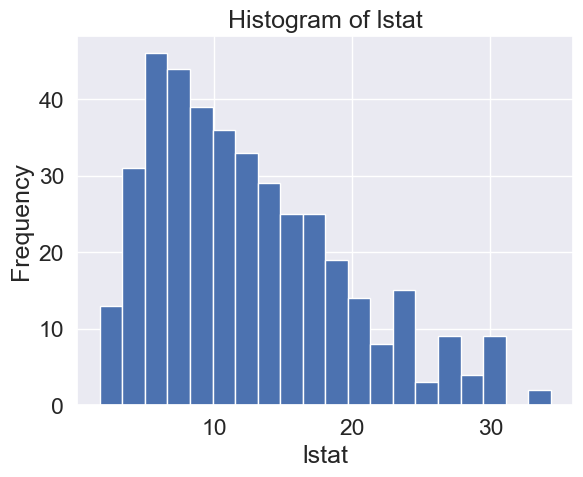

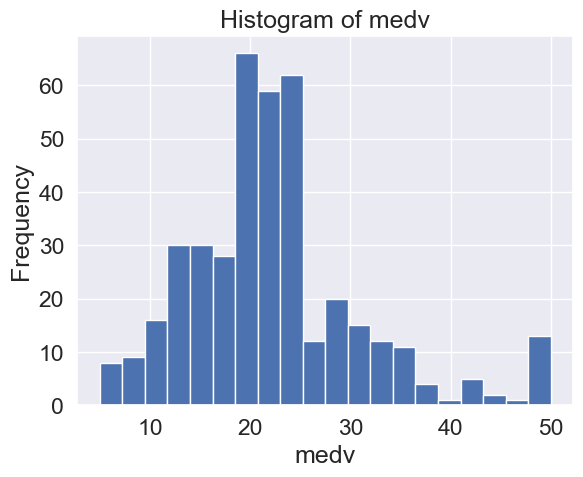

In [72]:
for column in boston.columns:
    # Create a histogram for each column
    plt.hist(boston[column], bins=20)  # You can adjust the number of bins as needed
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

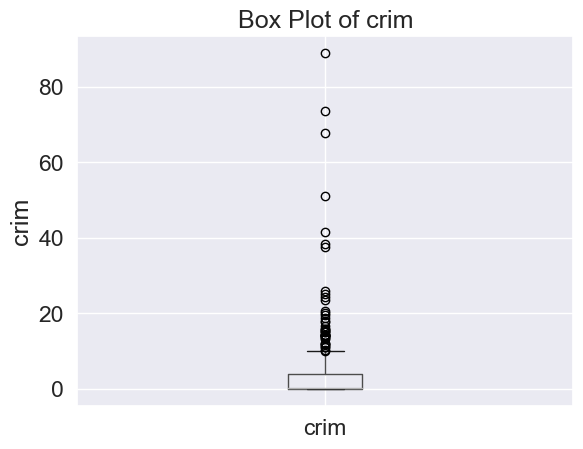

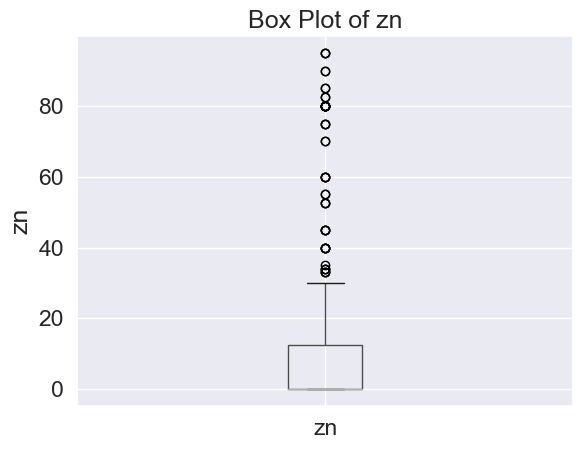

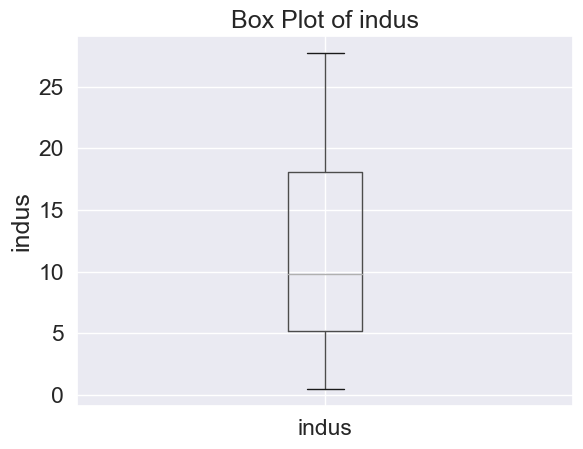

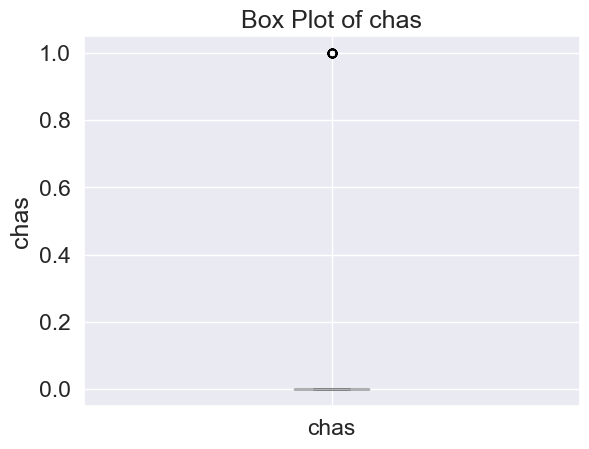

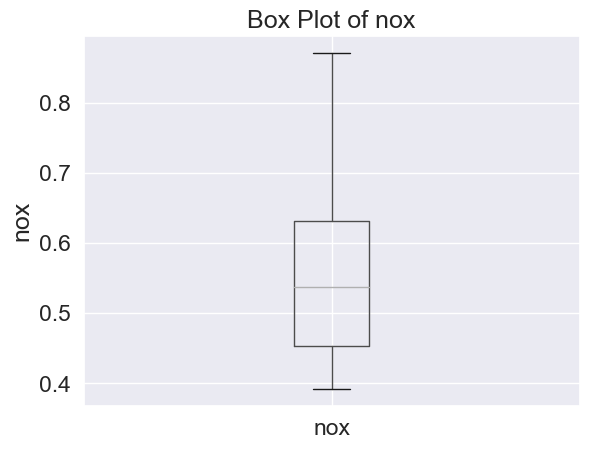

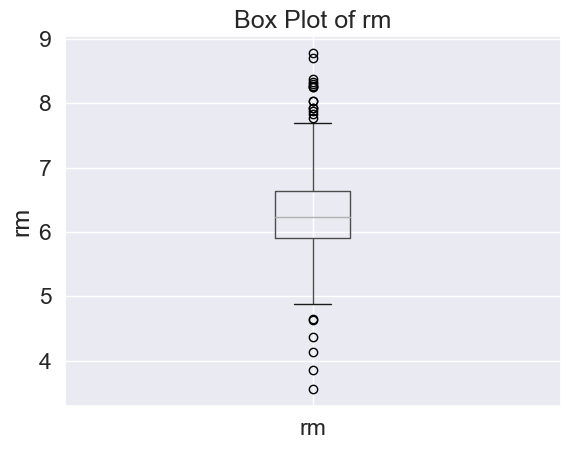

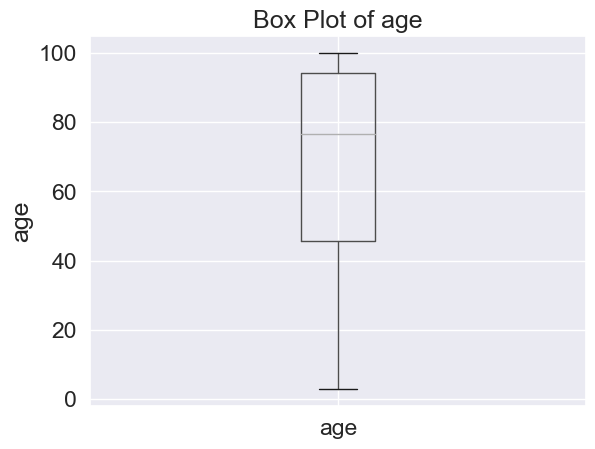

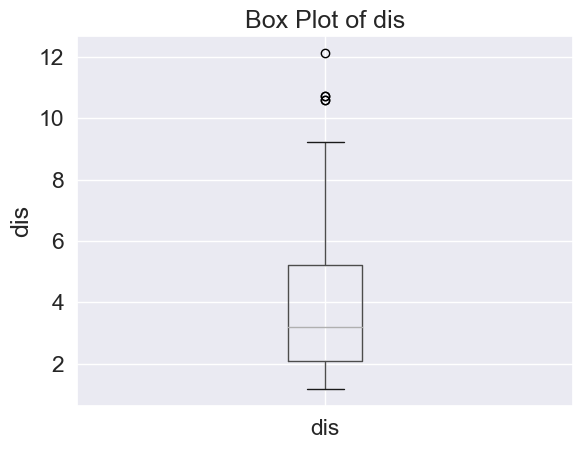

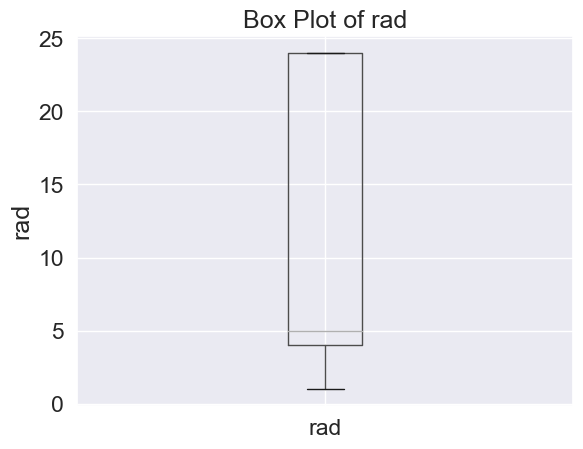

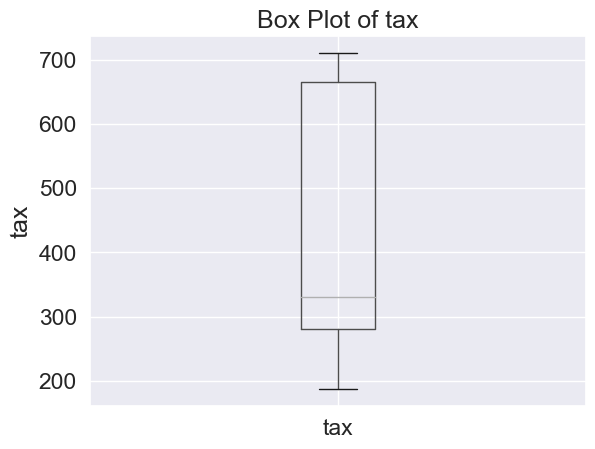

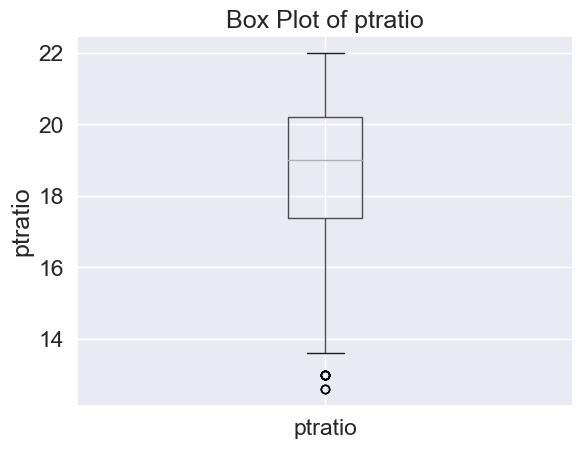

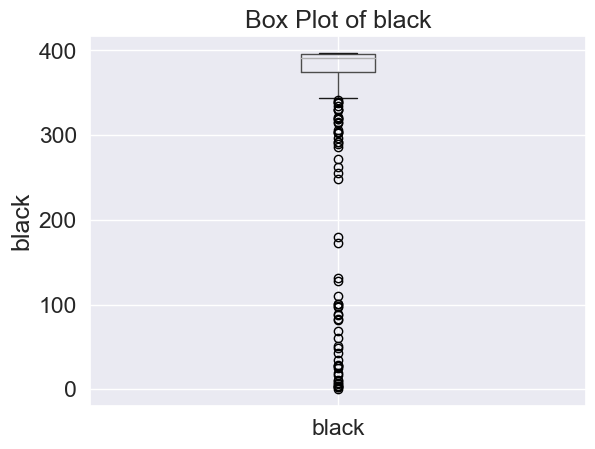

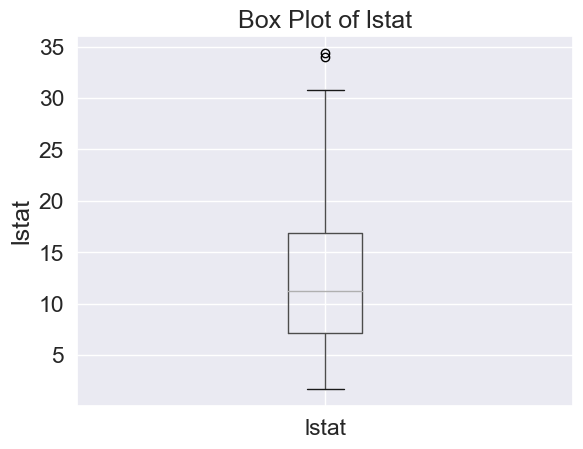

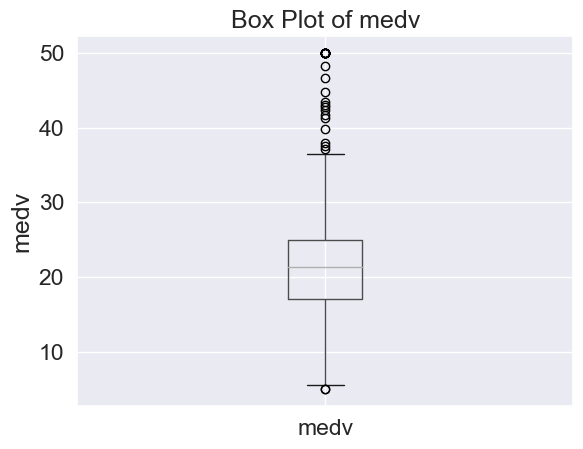

In [73]:
for column in boston.columns:
    # Create a box plot for each column
    boston.boxplot(column=column)
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
    plt.show()

In [7]:
# crim is positively skewed (posibly because of outlier), also as zn.
# chas has outlier at the point of 1. Nox, rm has normal distribution
# Age is skewed on the right and dis is skewed on the left. They all have some outliers
# Rad has outlier on the right and is skewed on the left. Also as tax
# we can also ptration has normal distribution and outlier on the right
# column black is not ethical and should be removed
# lstat is skewed on the left nad medv has normal distribution


In [74]:
# removing column black
boston2 = boston.drop('black', axis=1)
boston2.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,9.43,20.5


In [76]:
# counting outliers

# Calculatimg Z-scores for all columns
z_scores_all_columns = stats.zscore(boston2)

# Identifying outliers using a threshold (e.g., 3 standard deviations)
outliers_all_columns = (z_scores_all_columns > 3) | (z_scores_all_columns < -3)

# Displaying the number of outliers for each column
outliers_counts = outliers_all_columns.sum(axis=0)
print("Number of outliers for each column:")
print(outliers_counts)

Number of outliers for each column:
crim        7
zn         19
indus       0
chas       28
nox         0
rm          7
age         0
dis         5
rad         0
tax         0
ptratio     0
lstat       2
medv       12
dtype: int64


In [ ]:
# cleaning outliers

In [77]:
QI = boston['crim'].quantile(.75) - boston['crim'].quantile(.25)
outliers_upper_filter = boston['crim'].quantile(.75) + 1.5 * QI
outliers_lower_filter = boston['crim'].quantile(.25) - 1.5 * QI
boston = boston[(outliers_lower_filter < boston['crim']) & (boston['crim']<outliers_upper_filter)]

In [78]:
QI = boston['zn'].quantile(.75) - boston['zn'].quantile(.25)
outliers_upper_filter = boston['zn'].quantile(.75) + 1.5 * QI
outliers_lower_filter = boston['zn'].quantile(.25) - 1.5 * QI
boston = boston[(outliers_lower_filter < boston['zn']) & (boston['zn']<outliers_upper_filter)]

In [79]:
QI = boston['medv'].quantile(.75) - boston['medv'].quantile(.25)
outliers_upper_filter = boston['medv'].quantile(.75) + 1.5 * QI
outliers_lower_filter = boston['medv'].quantile(.25) - 1.5 * QI
boston = boston[(outliers_lower_filter < boston['medv']) & (boston['medv']<outliers_upper_filter)]

In [81]:
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,0.06899,0.0,25.65,0.0,0.581,5.870,69.7,2.2577,2.0,188.0,19.1,389.15,14.37,22.0
397,0.10084,0.0,10.01,0.0,0.547,6.715,81.6,2.6775,6.0,432.0,17.8,395.59,10.16,22.8
398,0.67191,0.0,8.14,0.0,0.538,5.813,90.3,4.6820,4.0,307.0,21.0,376.88,14.81,16.6
399,9.32909,0.0,18.10,0.0,0.713,6.185,98.7,2.2616,24.0,666.0,20.2,396.90,18.13,14.1


In [82]:
# counting outliers again

# Calculate Z-scores for all columns
z_scores_all_columns = stats.zscore(boston)

# Identify outliers using a threshold (e.g., 3 standard deviations)
outliers_all_columns = (z_scores_all_columns > 3) | (z_scores_all_columns < -3)

# Display the number of outliers for each column
outliers_counts = outliers_all_columns.sum(axis=0)
print("Number of outliers for each column:")
print(outliers_counts)

Number of outliers for each column:
crim        3
zn          9
indus       0
chas       23
nox         0
rm          2
age         0
dis         1
rad         0
tax         0
ptratio     0
black      15
lstat       2
medv        0
dtype: int64


### Next, we want to explore the data. Pick several varibables you think will be most correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

<AxesSubplot: >

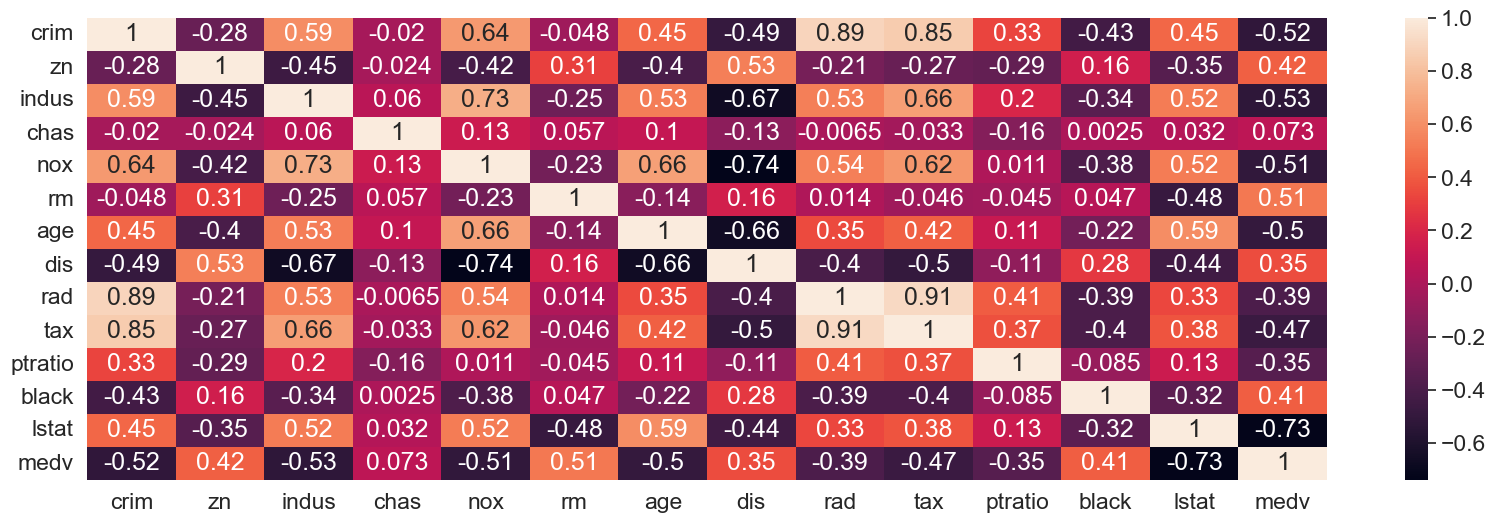

In [84]:
# checking correlation
boston_corr = boston.corr()

plt.figure(figsize=(20, 6))
sns.heatmap(boston_corr, annot=True)

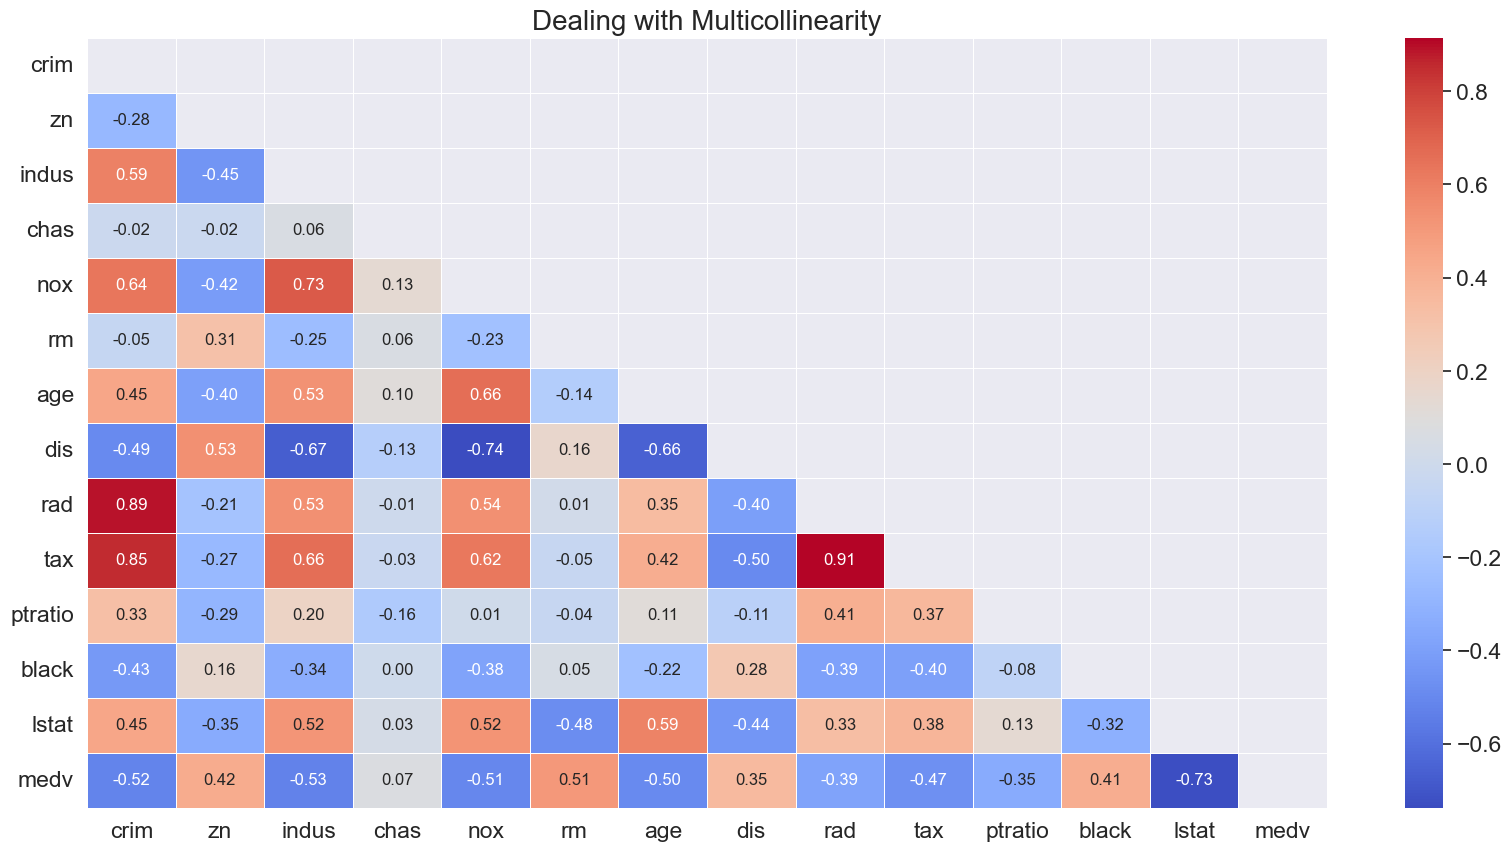

In [85]:
import plotly.express as px
mask = np.zeros_like(boston_corr)
mask[np.triu_indices_from(mask)] = True # to hide half of the matrix
f, ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale=1.5)
ax = sns.heatmap(boston_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap='coolwarm', fmt=".2f", ax=ax)
ax.set_title("Dealing with Multicollinearity", fontsize=20)
plt.show()

In [ ]:
# zn, chas, rm , dis, ptration and medv has good correlation.

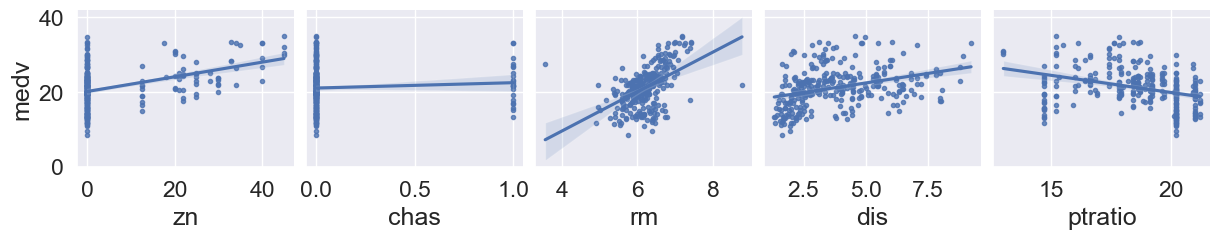

In [91]:
columns_of_interest = ['zn', 'chas', 'rm', 'dis', 'ptratio', 'medv']
subset_df = boston[columns_of_interest]

# Create a pairplot with 'medv' as the y-variable
sns.pairplot(subset_df, y_vars=['medv'], x_vars=['zn', 'chas', 'rm', 'dis', 'ptratio'], kind='reg', markers='.')
plt.show()

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [15]:
# medv has positive correlation with zn, chas, rm and dis and negative with ptration

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

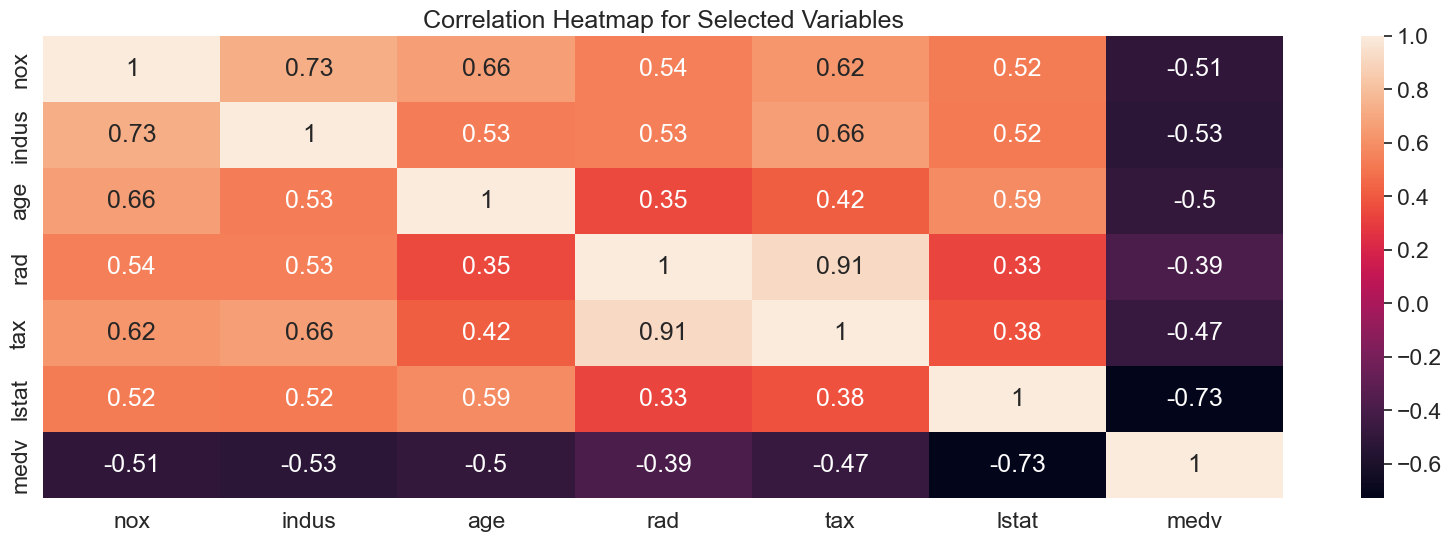

In [93]:
boston_housing = boston[['nox', 'indus', 'age', 'rad', 'tax', 'lstat', 'medv']]
boston_housing_corr = boston_housing.corr()

plt.figure(figsize=(20, 6))
sns.heatmap(boston_housing_corr, annot=True)
plt.title("Correlation Heatmap for Selected Variables")
plt.show()

In [ ]:
# indus and tax have good correlation

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [94]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,1.705013,5.273490,11.334866,0.077181,0.557057,6.204785,68.901678,3.774345,8.791946,392.083893,18.571477,365.058926,12.577785,21.181544
std,2.706205,11.240928,6.397697,0.267328,0.117036,0.501959,26.545632,1.777845,8.161893,159.190766,1.970188,78.433885,5.756191,5.223551
min,0.006320,0.000000,1.250000,0.000000,0.409000,3.561000,2.900000,1.321600,1.000000,188.000000,13.000000,0.320000,2.940000,8.500000
25%,0.092555,0.000000,6.070000,0.000000,0.464000,5.889500,49.025000,2.317750,4.000000,281.000000,17.400000,377.587500,8.062500,17.800000
50%,0.220945,0.000000,9.900000,0.000000,0.532000,6.175000,74.850000,3.376500,5.000000,311.000000,19.000000,391.985000,11.650000,21.200000
75%,2.310525,0.000000,18.100000,0.000000,0.608000,6.481750,92.550000,4.812200,8.000000,432.000000,20.200000,396.060000,16.275000,23.900000
max,9.966540,45.000000,27.740000,1.000000,0.871000,8.780000,100.000000,9.222900,24.000000,711.000000,21.200000,396.900000,30.810000,34.900000


----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [98]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    score = r2_score(y_true, y_predict)
    return score

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [99]:
# X and y split
from sklearn.model_selection import train_test_split

In [100]:
X = boston.drop(columns=['medv'], axis=1)
y = boston['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,shuffle=True)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [105]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [125]:
depths = [2, 4, 6, 8,10]

In [126]:
for max_depth_value in max_depth_values:
    rf_model = RandomForestRegressor(n_estimators=10, max_depth=max_depth_value, random_state=42) 
                                
    rf_model.fit(X_train, y_train)
    print('Train score:', rf_model.score(X_train, y_train))
    print('Test score:', rf_model.score(X_test, y_test))

Train score: 0.7329971812064754
Test score: 0.6367243032149642
Train score: 0.8702392666260172
Test score: 0.680138317996436
Train score: 0.9325767291980583
Test score: 0.7099489762283171
Train score: 0.9514791903439368
Test score: 0.7062035267733229
Train score: 0.9576338054916879
Test score: 0.7097112894338611


Now, plot the score for each tree on the training set and on the testing set.

In [21]:
# Produce a plot with the score for the testing and training for the different max depths

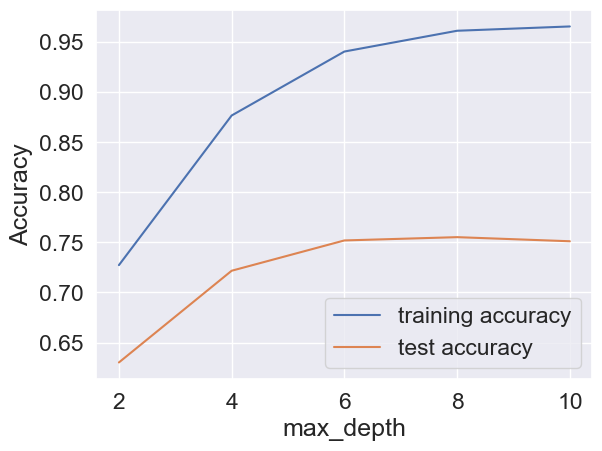

In [131]:
max_depth = [2,4,6,8,10]
test = []
train = []

for depth in max_depth:
    model = RandomForestRegressor(max_depth= depth,random_state=42)
    model.fit(X_train, y_train)
    train.append(model.score(X_train,y_train))
    test.append(model.score(X_test,y_test))
    

plt.plot(max_depth_values, train, label="training accuracy")
plt.plot(max_depth_values, test, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()  
plt.show()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [22]:
# On the depht 6 model starts to overfit.

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? Check out this article before answering: https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

In [23]:
# Your response here

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [24]:
# Your response here

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [25]:
# Your response here